In [3]:
import pandas as pd

# Load the pickle file
final_df = pd.read_pickle("/Users/lb962/Downloads/ESL/GESLA/data/ml_ready/Northseahourly.pkl")

Mean Squared Error: 0.5064742375976284


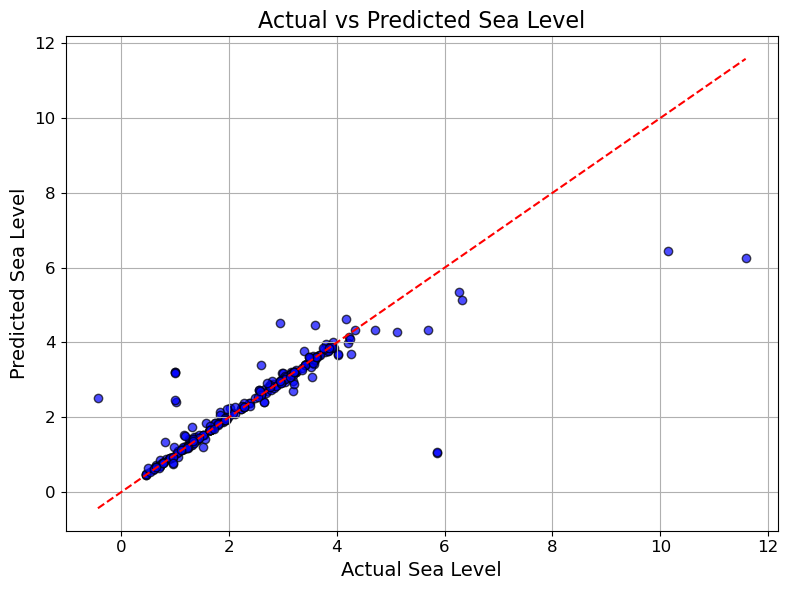

In [34]:
final_df = final_df[['q_sea_level', 'u10', 'v10',
       'mdts', 'mpts', 'mwd', 'mwp', 'sst', 'shts', 'shww', 'sp',
       'tide', 'HAT', 'LAT', 'MHHW', 'MLLW', 'MSL', 'TR']].dropna()


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target variable (y)
X = final_df[['u10', 'v10',
       'mdts', 'mpts', 'mwd', 'mwp', 'sst', 'shts', 'shww', 'sp',
       'tide', 'HAT', 'LAT', 'MHHW', 'MLLW', 'MSL', 'TR']]
y = final_df['q_sea_level']

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sea Level', fontsize=14)
plt.ylabel('Predicted Sea Level', fontsize=14)
plt.title('Actual vs Predicted Sea Level', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


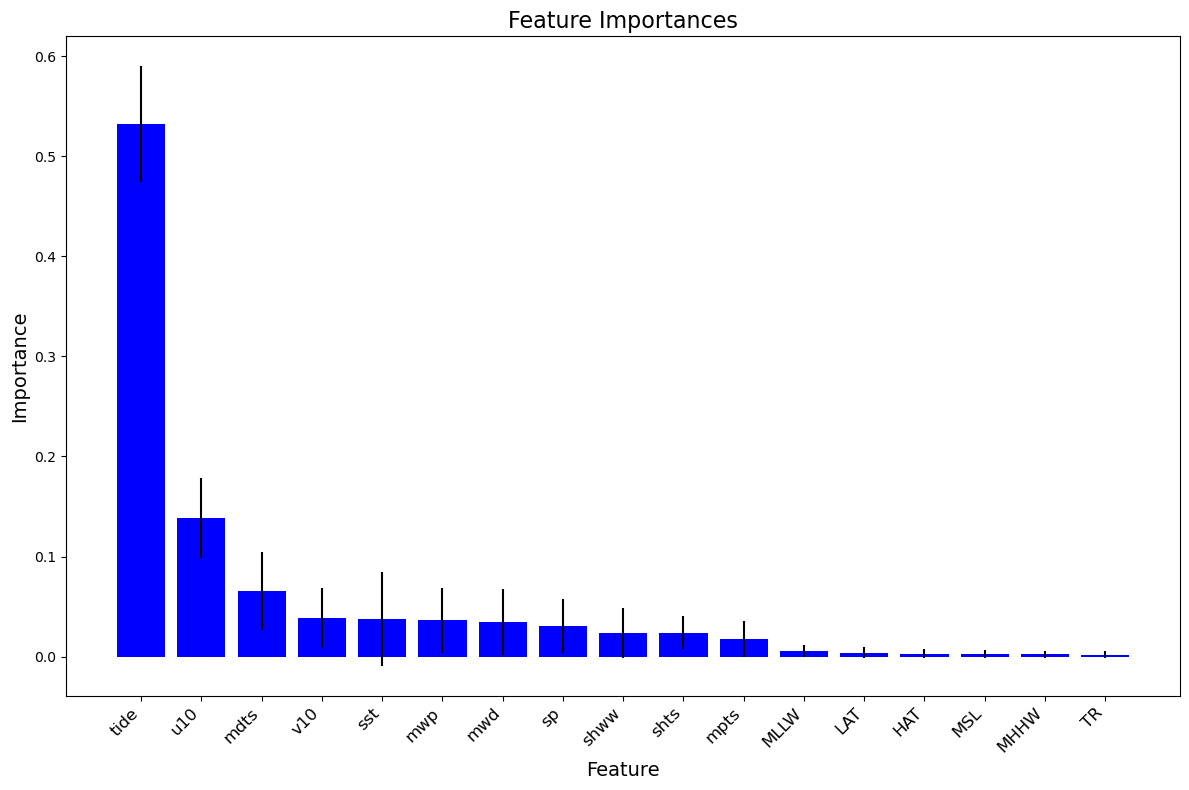

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the entire data
rf_regressor.fit(X_scaled, y)

# Get feature importances
importances = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X.columns.tolist()

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances", fontsize=16)
plt.bar(range(X.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, fontsize=12, ha="right")
plt.ylabel("Importance", fontsize=14)
plt.xlabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()


In [36]:
from sklearn.metrics import r2_score

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.7544620039738732


In [19]:
import pandas as pd

# Load the pickle file
final_df = pd.read_pickle("/Users/lb962/Downloads/ESL/GESLA/data/ml_ready/Northsea14h.pkl")
final_df.columns

Index(['latitude', 'longitude', 'date_time', 'q_sea_level', 'u10', 'v10',
       'mwd', 'swh', 'msl', 'sst', 'tp', 'index', 'stations', 'tide', 'HAT',
       'LAT', 'MHHW', 'MLLW', 'MSL', 'TR'],
      dtype='object')

In [9]:
final_df = final_df[['q_sea_level', 'u10', 'v10',
       'mwd', 'swh', 'msl', 'sst', 'tp', 'tide', 'HAT',
       'LAT', 'MHHW', 'MLLW', 'MSL', 'TR']].dropna()
final_df

,q_sea_level,u10,v10,mwd,swh,msl,sst,tp,tide,HAT,LAT,MHHW,MLLW,MSL,TR
6350,0.890,-2.885031,-2.535789,346.675232,0.520329,102603.648438,285.125946,0.000000,0.155333,0.217,-0.249,0.152,-0.158,0.023,0.310
6351,0.890,-2.885031,-2.535789,346.675232,0.520329,102603.648438,285.125946,0.000000,0.156167,0.213,-0.247,0.149,-0.156,0.023,0.305
6352,0.890,-2.885031,-2.535789,346.675232,0.520329,102603.648438,285.125946,0.000000,0.156167,0.213,-0.247,0.149,-0.156,0.023,0.305
6353,0.890,-2.885031,-2.535789,346.675232,0.520329,102603.648438,285.125946,0.000000,1.056167,2.591,-2.818,1.834,-1.949,0.008,3.783
6354,0.890,-2.885031,-2.535789,346.675232,0.520329,102603.648438,285.125946,0.000000,1.033500,2.571,-2.790,1.816,-1.927,0.004,3.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67844,0.410,8.641776,5.093891,236.042633,3.462253,100917.476562,283.857483,0.000556,0.122167,2.571,-2.790,1.816,-1.927,0.004,3.743
67845,2.005,6.987635,-1.470734,268.102417,1.313712,103152.281250,283.936462,0.000000,2.102333,2.591,-2.818,1.834,-1.949,0.008,3.783
67846,2.005,6.987635,-1.470734,268.102417,1.313712,103152.281250,283.936462,0.000000,2.076500,2.571,-2.790,1.816,-1.927,0.004,3.743
67847,2.174,-5.465606,5.515748,221.473999,2.198436,101342.773438,283.515869,0.002232,2.205167,2.591,-2.818,1.834,-1.949,0.008,3.783


Mean Squared Error: 0.05542722800905763


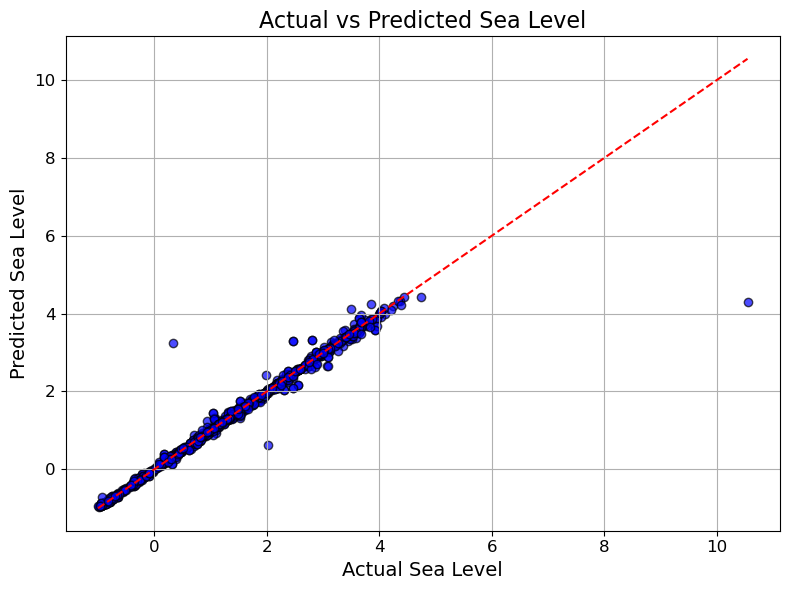

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target variable (y)
X = final_df[['u10', 'v10', 'mwd', 'swh', 'msl', 'sst', 'tp', 'tide', 'HAT', 'LAT', 'MHHW', 'MLLW', 'MSL', 'TR']]
y = final_df['q_sea_level']

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sea Level', fontsize=14)
plt.ylabel('Predicted Sea Level', fontsize=14)
plt.title('Actual vs Predicted Sea Level', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import r2_score

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9678172811396069


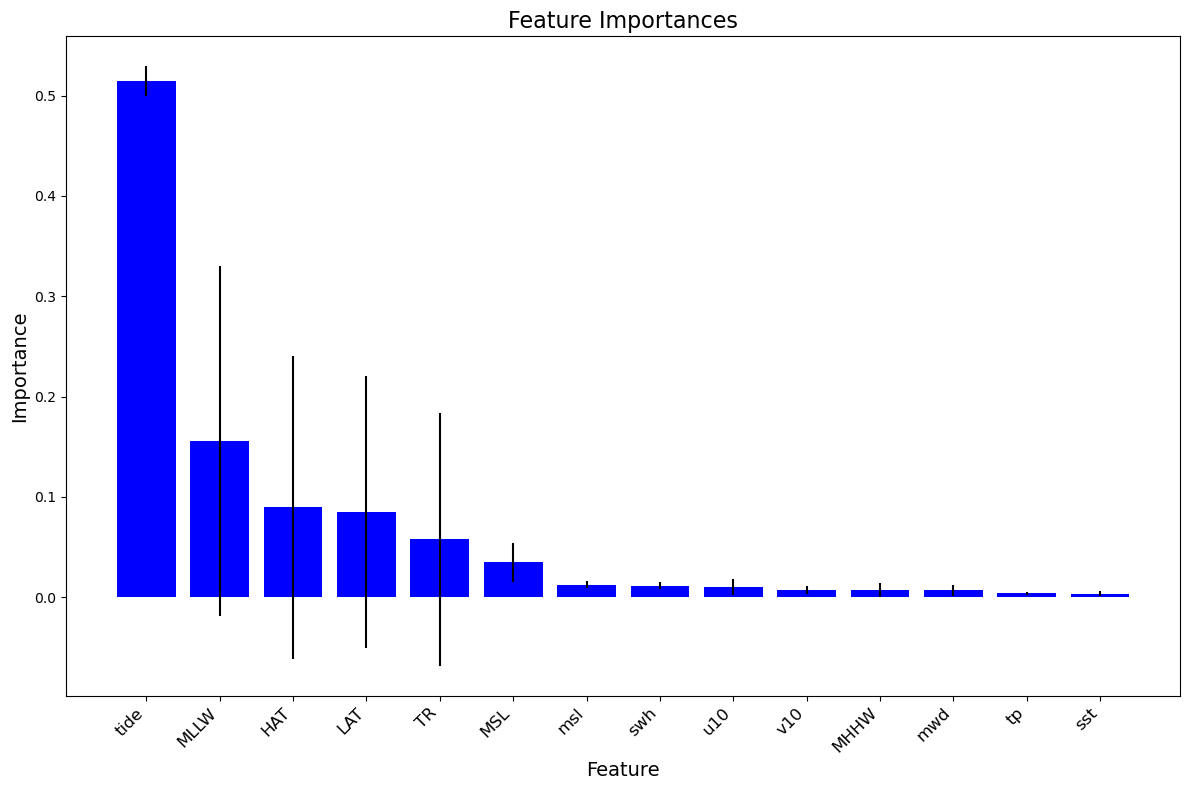

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the entire data
rf_regressor.fit(X_scaled, y)

# Get feature importances
importances = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X.columns.tolist()

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances", fontsize=16)
plt.bar(range(X.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, fontsize=12, ha="right")
plt.ylabel("Importance", fontsize=14)
plt.xlabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()
